In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# Load the dataset
df = pd.read_csv("/content/database.csv")

# Drop rows with NaN in 'Magnitude'
df = df.dropna(subset=['Magnitude'])

# Classify Magnitude
def classify_magnitude(mag):
    if mag <= 5.8:
        return 'Low'
    elif mag <= 6.5:
        return 'Moderate'
    elif mag <= 7.5:
        return 'Strong'
    else:
        return 'Severe'

# Apply classification
df['MagClass'] = df['Magnitude'].apply(classify_magnitude)

# Features for classification and regression
features = ['Latitude', 'Longitude', 'Depth', 'Root Mean Square']
df = df.dropna(subset=features)

X = df[features]
y_class = df['MagClass']
y_reg = df['Magnitude']

# Encode target for classification
le = LabelEncoder()
y_encoded = le.fit_transform(y_class)

# Train/test split
X_train, X_test, y_train_clf, y_test_clf = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_reg_scaled = scaler.fit_transform(X_train_reg)
X_test_reg_scaled = scaler.transform(X_test_reg)

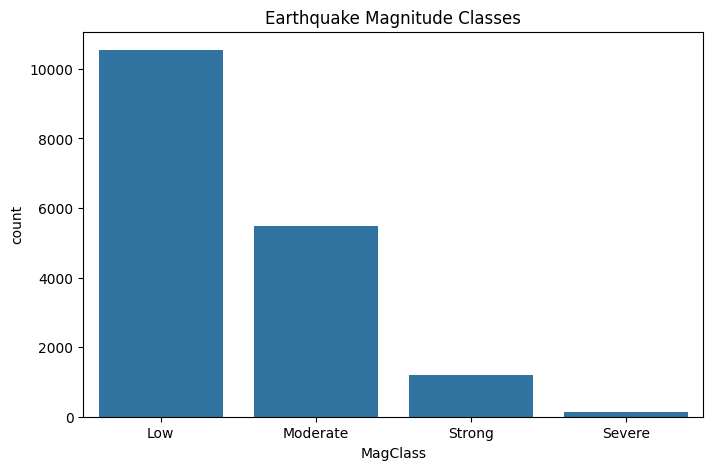

In [ ]:
# Visualization: Countplot of Magnitude Classes
plt.figure(figsize=(8, 5))
sns.countplot(x='MagClass', data=df, order=['Low', 'Moderate', 'Strong', 'Severe'])
plt.title('Earthquake Magnitude Classes')
plt.show()

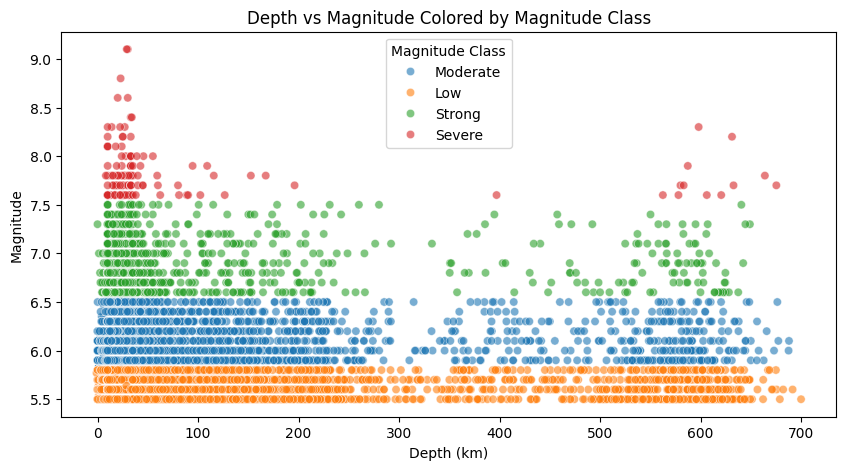

In [ ]:
# Scatterplot of Depth vs Magnitude
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Depth', y='Magnitude', hue='MagClass', alpha=0.6)
plt.title("Depth vs Magnitude Colored by Magnitude Class")
plt.xlabel("Depth (km)")
plt.ylabel("Magnitude")
plt.legend(title="Magnitude Class")
plt.show()

In [ ]:
# Convert 'Date' column to datetime with UTC
df['Date'] = pd.to_datetime(df['Date'], utc=True, errors='coerce')

# Drop rows with NaT in 'Date'
df = df.dropna(subset=['Date'])

# Optionally convert to naive datetime
df['Date'] = df['Date'].dt.tz_localize(None)

# Extract Year, Month, Day
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

/tmp/ipython-input-5-1790408207.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].dt.tz_localize(None)
/tmp/ipython-input-5-1790408207.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Date'].dt.year
/tmp/ipython-input-5-1790408207.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

/tmp/ipython-input-6-1286140197.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='MagClass', y='Magnitude', data=df, order=['Low', 'Moderate', 'Strong', 'Severe'], palette='coolwarm')


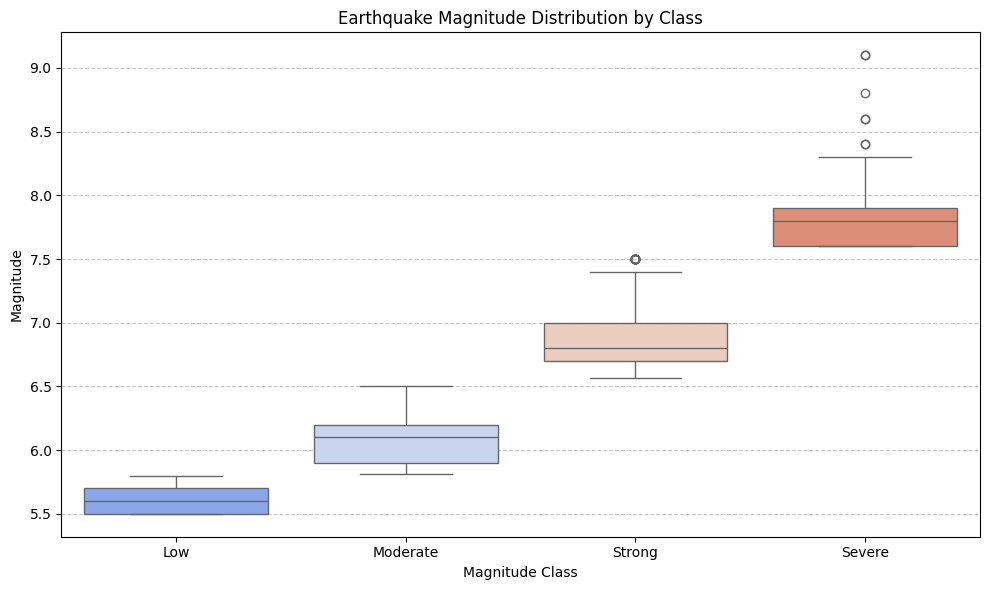

In [ ]:
# Box Plot of Magnitudes by MagClass
plt.figure(figsize=(10, 6))
sns.boxplot(x='MagClass', y='Magnitude', data=df, order=['Low', 'Moderate', 'Strong', 'Severe'], palette='coolwarm')
plt.title('Earthquake Magnitude Distribution by Class')
plt.xlabel('Magnitude Class')
plt.ylabel('Magnitude')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

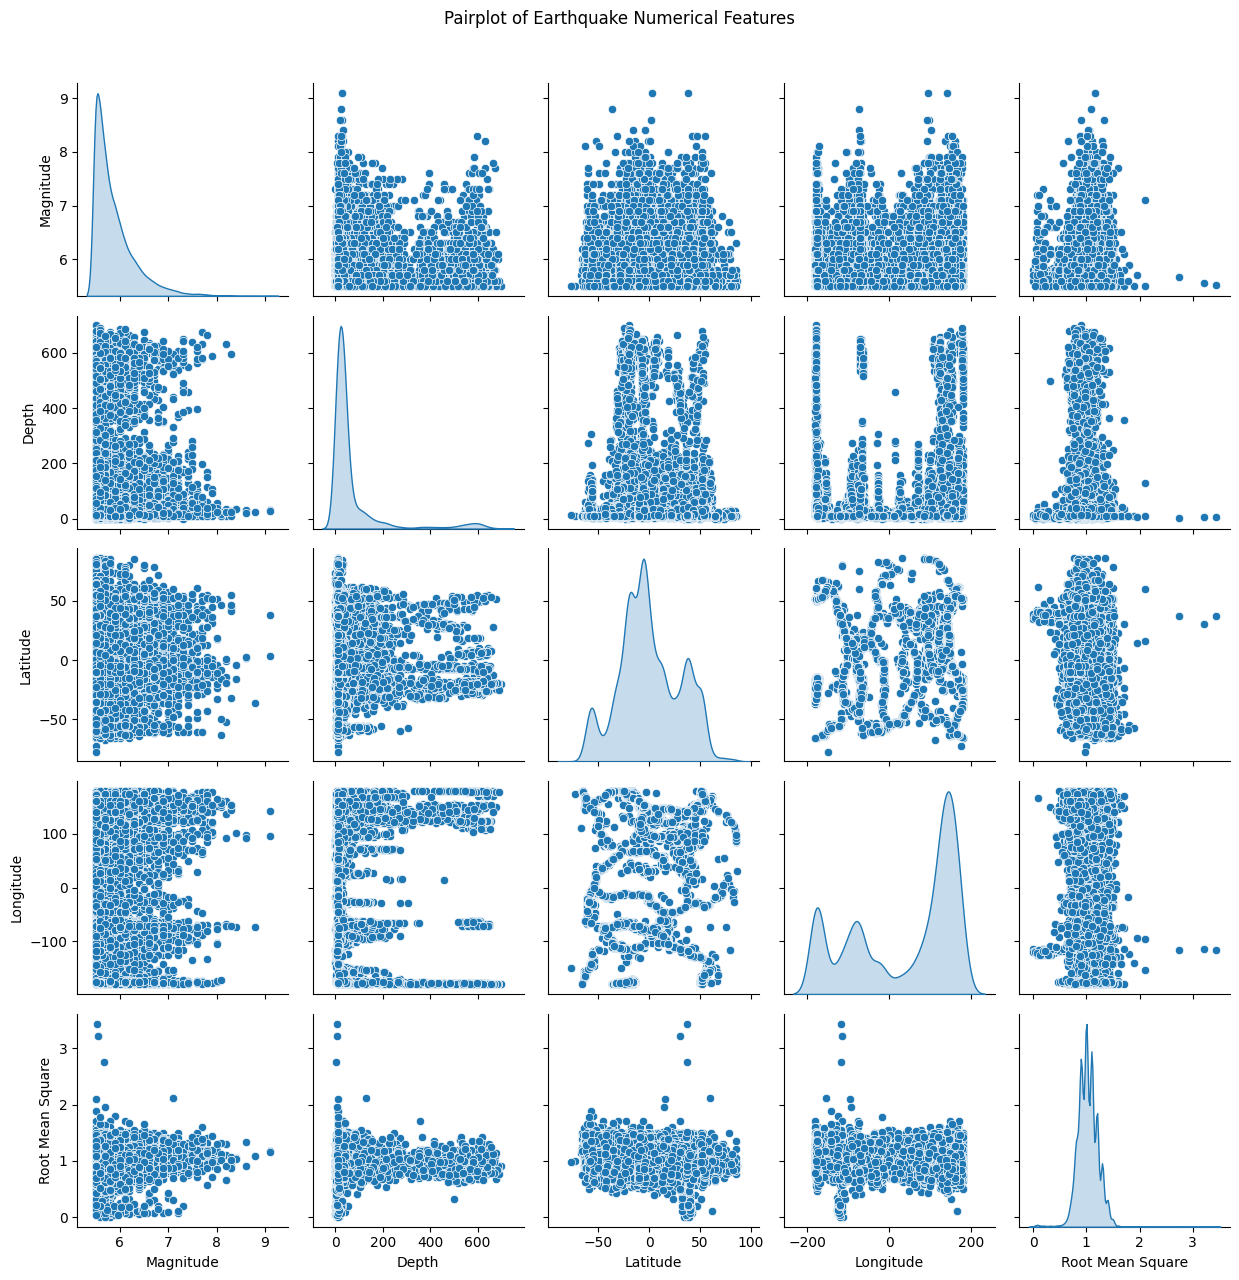

In [ ]:
# Pairplot of Numerical Features
numerical_features = ['Magnitude', 'Depth', 'Latitude', 'Longitude', 'Root Mean Square']
sns.pairplot(df[numerical_features].dropna(), diag_kind='kde')
plt.suptitle('Pairplot of Earthquake Numerical Features', y=1.02)  # Adjust suptitle position
plt.tight_layout()
plt.show()

/tmp/ipython-input-8-2880937163.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Year', data=df, palette='viridis')


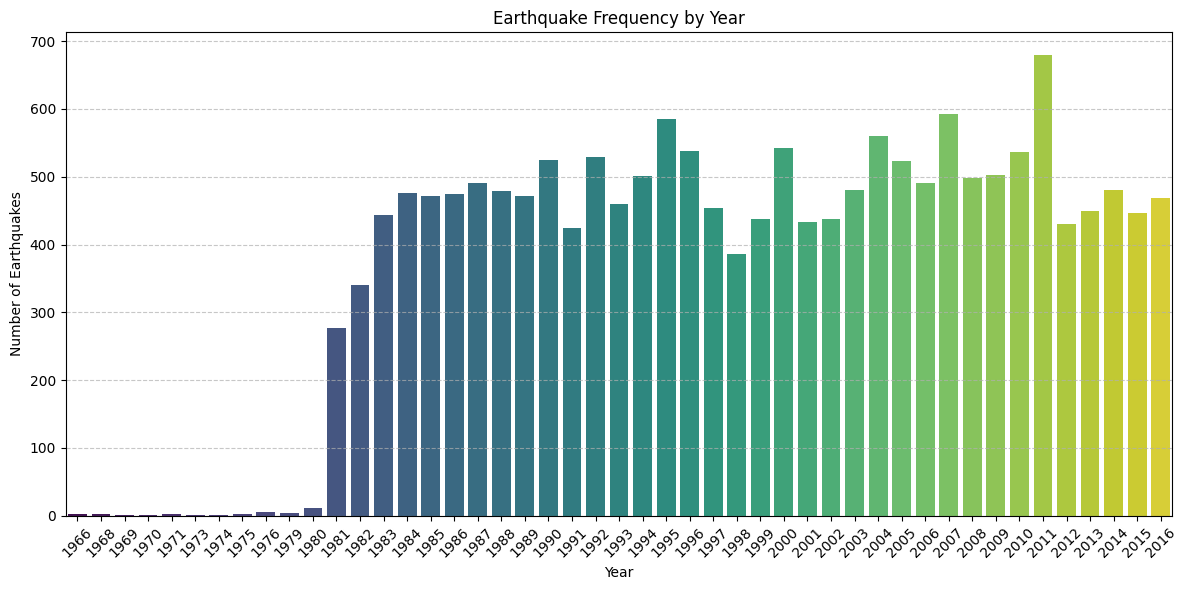

In [ ]:
# Earthquake Frequency by Year
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', data=df, palette='viridis')
plt.title('Earthquake Frequency by Year')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

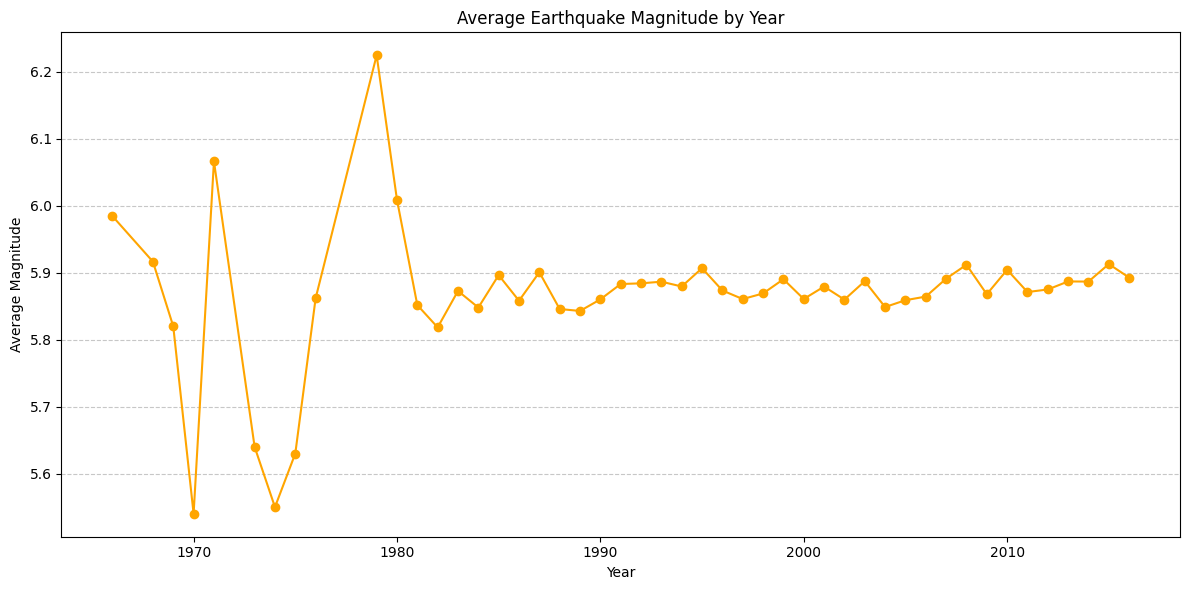

In [ ]:
# Average Magnitude by Year
plt.figure(figsize=(12, 6))
df.groupby('Year')['Magnitude'].mean().plot(kind='line', marker='o', color='orange')
plt.title('Average Earthquake Magnitude by Year')
plt.xlabel('Year')
plt.ylabel('Average Magnitude')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/tmp/ipython-input-10-3833014604.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Month', data=df, palette='plasma')


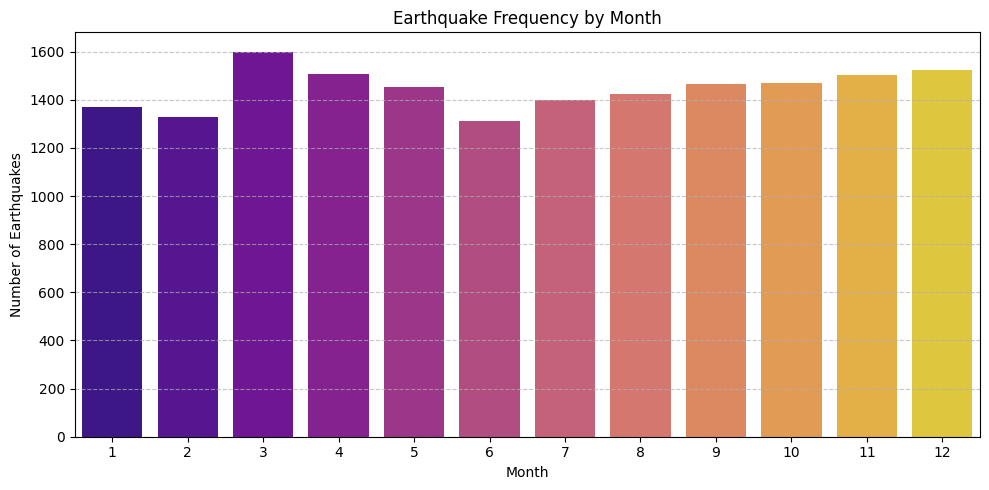

In [ ]:
# Earthquake Frequency by Month
plt.figure(figsize=(10, 5))
sns.countplot(x='Month', data=df, palette='plasma')
plt.title('Earthquake Frequency by Month')
plt.xlabel('Month')
plt.ylabel('Number of Earthquakes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

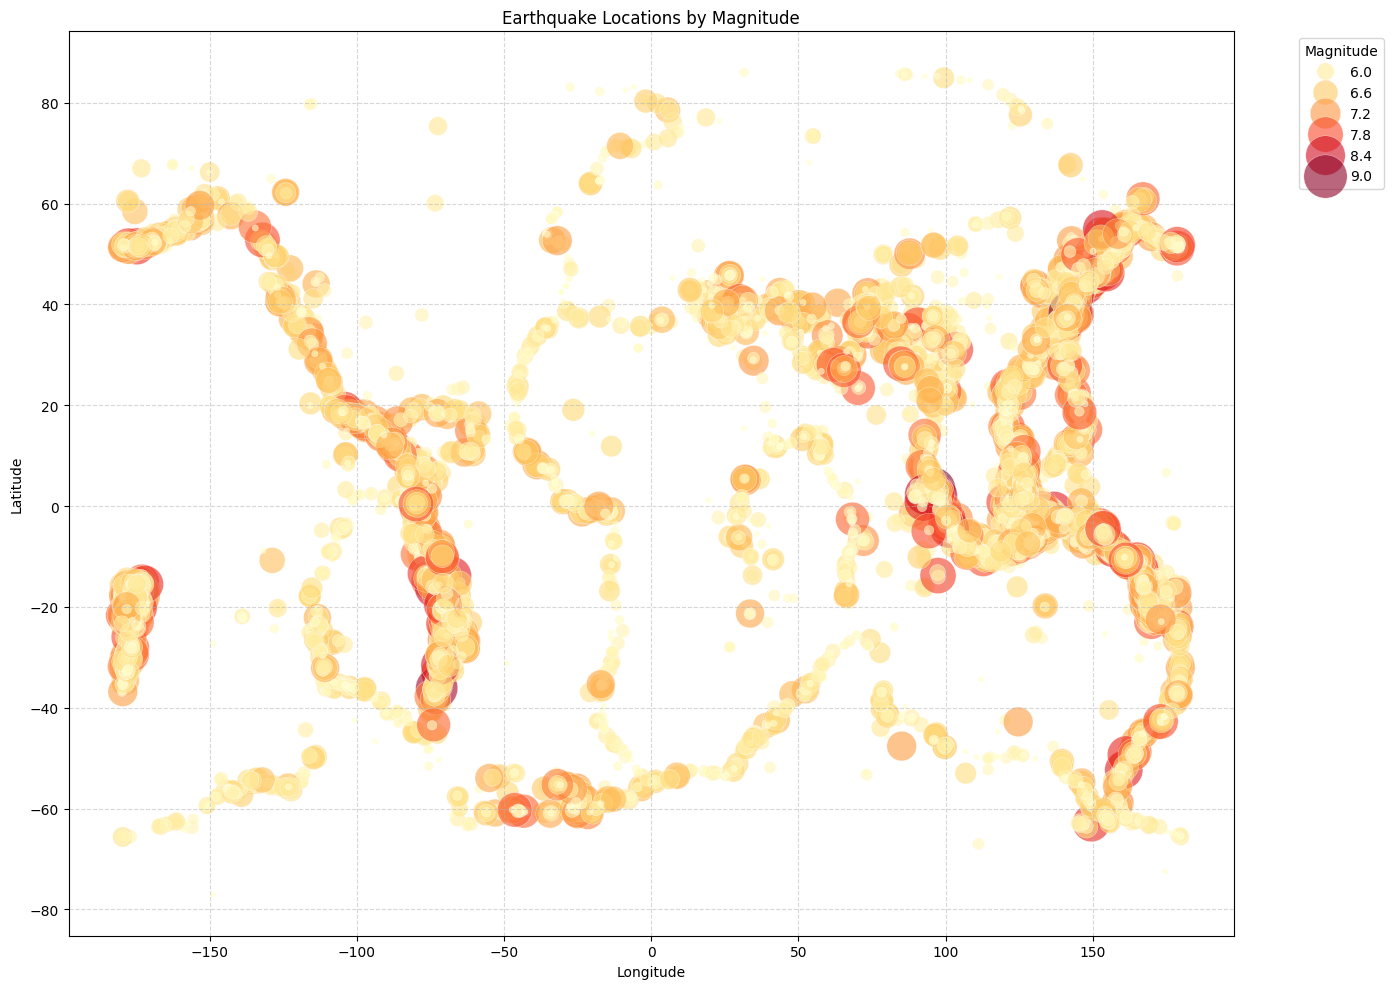

In [ ]:
# Earthquake Locations by Magnitude
plt.figure(figsize=(14, 10))
sns.scatterplot(x='Longitude', y='Latitude', hue='Magnitude', size='Magnitude',
                sizes=(20, 1000), alpha=0.6, palette='YlOrRd', data=df)
plt.title('Earthquake Locations by Magnitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Magnitude', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

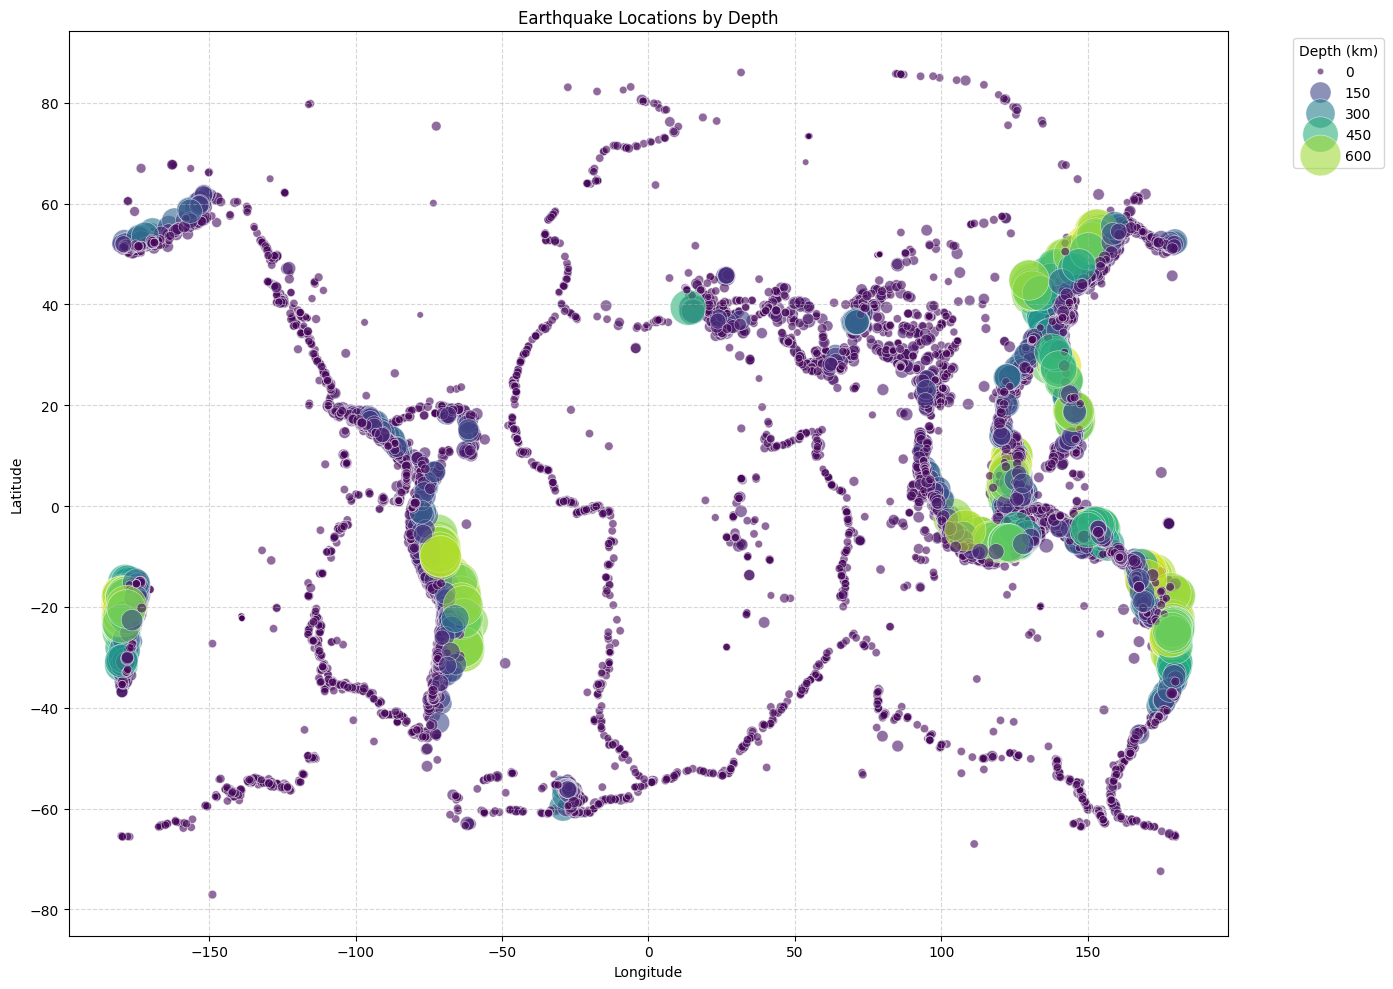

In [ ]:
# Earthquake Locations by Depth
plt.figure(figsize=(14, 10))
sns.scatterplot(x='Longitude', y='Latitude', hue='Depth', size='Depth',
                sizes=(20, 1000), alpha=0.6, palette='viridis', data=df)
plt.title('Earthquake Locations by Depth')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Depth (km)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

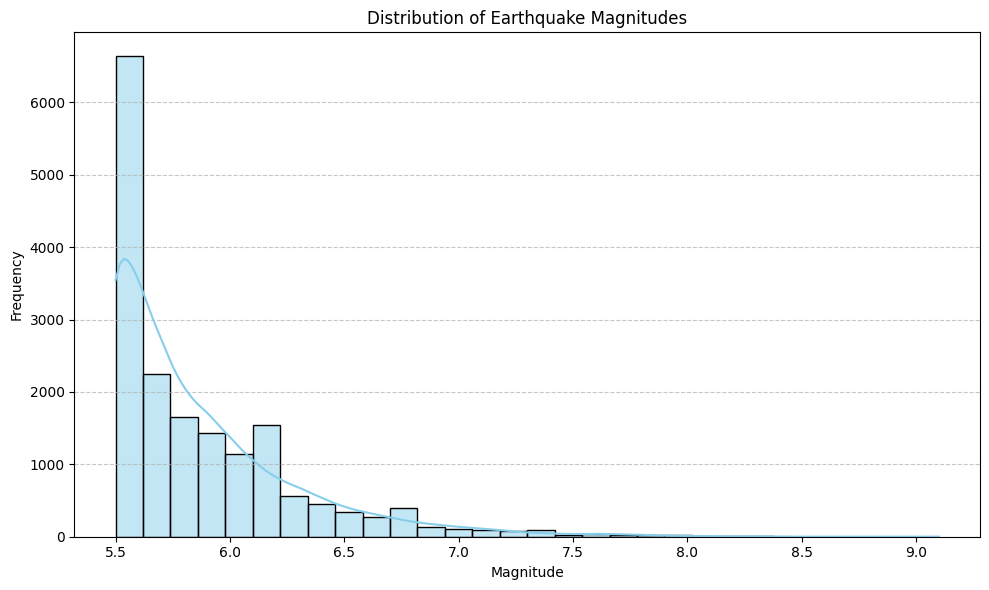

In [ ]:
# Histogram of Earthquake Magnitudes
plt.figure(figsize=(10, 6))
sns.histplot(df['Magnitude'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Earthquake Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
print("\n Linear Regression with OLS Summary ")
X_ols = sm.add_constant(X_train_reg_scaled)
model_ols = sm.OLS(y_train_reg, X_ols).fit()
print(model_ols.summary())

# notes:
# - P-value < 0.05 indicates statistically significant features.
# - R-squared shows how much variance in magnitude is explained by the model.print("\n Random Forest Classifier ")


 Linear Regression with OLS Summary 
                            OLS Regression Results                            
Dep. Variable:              Magnitude   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     45.53
Date:                Thu, 17 Jul 2025   Prob (F-statistic):           4.62e-38
Time:                        01:06:05   Log-Likelihood:                -7512.7
No. Observations:               13881   AIC:                         1.504e+04
Df Residuals:                   13876   BIC:                         1.507e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         

In [ ]:
start = time.time()
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_scaled, y_train_clf)
end = time.time()

y_pred_rf = rf_clf.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test_clf, y_pred_rf))
print("Training Time:", end - start, "seconds")
print(confusion_matrix(y_test_clf, y_pred_rf))
print(classification_report(y_test_clf, y_pred_rf, target_names=le.classes_));
def train_random_forest_parallel(X, y):
    model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
    model.fit(X, y)
    return model

print("\n Random Forest with Multiprocessing ")
start = time.time()
rf_parallel = train_random_forest_parallel(X_train_scaled, y_train_clf)
end = time.time()

pred_parallel = rf_parallel.predict(X_test_scaled)
print("Accuracy (Parallel):", accuracy_score(y_test_clf, pred_parallel))
print("Training Time (Parallel):", end - start, "seconds")

Accuracy: 0.5707288965715932
Training Time: 4.117776155471802 seconds
[[1683  402    0   30]
 [ 763  288    1   21]
 [  21   10    0    4]
 [ 153   84    1   10]]
              precision    recall  f1-score   support

         Low       0.64      0.80      0.71      2115
    Moderate       0.37      0.27      0.31      1073
      Severe       0.00      0.00      0.00        35
      Strong       0.15      0.04      0.06       248

    accuracy                           0.57      3471
   macro avg       0.29      0.28      0.27      3471
weighted avg       0.52      0.57      0.53      3471


 Random Forest with Multiprocessing 
Accuracy (Parallel): 0.5707288965715932
Training Time (Parallel): 4.4205803871154785 seconds


In [ ]:
pip install optuna scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 16.9 MB/s eta 0:00:00


In [ ]:
import optuna

In [ ]:
df = pd.read_csv("/content/database.csv")
df = df.dropna(subset=['Magnitude'])

features = ['Latitude', 'Longitude', 'Depth', 'Root Mean Square']
df = df.dropna(subset=features)

X = df[features]
y = df['Magnitude'].apply(lambda mag: 'Low' if mag <= 5.8 else 'Moderate' if mag <= 6.5 else 'Strong' if mag <= 7.5 else 'Severe')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 4),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),  # Updated here
    }
    model = RandomForestClassifier(**params, random_state=42)
    model.fit(X_train_scaled, y_train)
    return model.score(X_test_scaled, y_test)


start = time.time()
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)  # Adjust n_trials for speed/accuracy tradeoff
print(f"Best params: {study.best_params}")
print(f"Best accuracy: {study.best_value:.4f}")
print(f"Time taken: {time.time() - start:.2f} seconds")

[I 2025-07-17 02:14:16,134] A new study created in memory with name: no-name-de58b33e-6947-456f-bc63-b72ffa6c62b5
[I 2025-07-17 02:14:23,341] Trial 0 finished with value: 0.6179775280898876 and parameters: {'n_estimators': 177, 'max_depth': 6, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 0 with value: 0.6179775280898876.
[I 2025-07-17 02:14:28,366] Trial 1 finished with value: 0.595793719389225 and parameters: {'n_estimators': 75, 'max_depth': 22, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 0 with value: 0.6179775280898876.
[I 2025-07-17 02:14:41,899] Trial 2 finished with value: 0.5972342264477096 and parameters: {'n_estimators': 221, 'max_depth': 22, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 0 with value: 0.6179775280898876.
[I 2025-07-17 02:14:52,061] Trial 3 finished with value: 0.6084701815038893 and parameters: {'n_estimators': 278, 'max_depth': 17, 'min_

Best params: {'n_estimators': 68, 'max_depth': 7, 'min_samples_split': 9, 'min_samples_leaf': 4, 'max_features': 'log2'}
Best accuracy: 0.6217
Time taken: 182.22 seconds
